In [203]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp

### importing data

In [148]:
def concat_dfs(folder_name):
    directory = r'./data/wyniki_gis_udział_luk/{}/*.csv'.format(folder_name)
    files = glob.glob(directory)
    df = []

    for f in files:   
        col_name = f.split('/')[-1].split('.')[0]
        csv = pd.read_csv(f, names = [col_name], keep_default_na=False, decimal=',')
        csv.reset_index(drop=True, inplace=True)
        df.append(csv)
    
    df2 = pd.concat(df,axis=1)
    return df2.reindex(sorted(df2.columns), axis=1)   

#### data preview

In [149]:
preview = concat_dfs('wyniki csv 10m północ')
preview

,martwe_drzewa_2014,martwe_drzewa_2015,martwe_drzewa_2016,martwe_drzewa_2017,martwe_drzewa_2018,martwe_drzewa_2019,martwe_drzewa_2020,martwe_drzewa_2021,zywe_drzewa_2014,zywe_drzewa_2015,zywe_drzewa_2016,zywe_drzewa_2017,zywe_drzewa_2018,zywe_drzewa_2019,zywe_drzewa_2020,zywe_drzewa_2021
0,78.676606,59.442884,48.021276,28.601377,109.077172,37.474313,138.463302,125.823057,35.787180,33.102046,33.355147,33.527376,32.775950,33.078457,32.772300,32.772395
1,87.708764,69.128894,20.567383,70.361647,133.927845,50.928487,147.226695,123.968151,21.179791,20.126245,20.231516,20.321681,19.610447,19.729468,19.720828,19.768899
2,102.748191,6.739718,24.170321,38.096430,155.595804,79.713134,20.370342,34.409464,27.269804,26.626030,26.598475,26.399674,26.611076,26.665738,27.116183,27.169297
3,55.174922,69.881268,17.269816,52.921073,120.201672,68.952123,58.241321,23.365528,95.649879,90.452817,90.550396,90.618415,90.223075,90.341930,90.196677,90.196464
4,20.637916,49.636894,26.081831,60.323686,72.151064,89.165291,93.539515,148.814514,102.584082,96.444875,96.515531,96.563444,96.344675,96.430678,96.321121,96.322274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.242266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.219380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.346482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.097022,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### data preparation

In [183]:
def prepare_data(data):
    data = pd.melt(data)
    
    d_2014_2019 = data.loc[(data['variable'].isin(['martwe_drzewa_2014',
                                                            'martwe_drzewa_2015',
                                                            'martwe_drzewa_2016',
                                                            'martwe_drzewa_2017',
                                                            'martwe_drzewa_2018']))].dropna()
    d_2019_2021 = data.loc[(data['variable'].isin(['martwe_drzewa_2019',
                                                            'martwe_drzewa_2020',
                                                            'martwe_drzewa_2021']))].dropna()
    
    s_2018 = data.loc[(data['variable'].isin(['zywe_drzewa_2018']))].dropna()
    s_2021 = data.loc[(data['variable'].isin(['zywe_drzewa_2021']))].dropna()
    
    d_2014_2019 = d_2014_2019.assign(variable='martwe 2014-2018')
    d_2019_2021 = d_2019_2021.assign(variable='martwe 2019-2021')
    s_2018 = s_2018.assign(variable='żywe 2018')
    s_2021 = s_2021.assign(variable='żywe 2021')
    
    df = pd.concat([d_2014_2019, d_2019_2021, s_2018, s_2021])
    
    df['value'] = pd.to_numeric(df['value'])

    df['udział luki (%)'] = (df['value'] * 100) / ((3.14 * 10 * 10) / 2)
    
    return df

In [195]:
north_10m = prepare_data(concat_dfs('wyniki csv 10m północ'))
south_10m = prepare_data(concat_dfs('wyniki csv 10m południe'))

### Visualization the proportion of gaps in the stand (10m) and perform the Kolmogorov-Smirnov test for two samples

In [196]:
%matplotlib inline

#### North

In [199]:
north_10m.reset_index(inplace=True)
north_10m

,level_0,index,variable,value,udział luki (%)
0,0,0,martwe 2014-2018,78.676606,50.112488
1,1,1,martwe 2014-2018,87.708764,55.865455
2,2,2,martwe 2014-2018,102.748191,65.444708
3,3,3,martwe 2014-2018,55.174922,35.143262
4,4,4,martwe 2014-2018,20.637916,13.145170
...,...,...,...,...,...
4475,4475,37409,żywe 2021,75.968722,48.387721
4476,4476,37410,żywe 2021,90.962545,57.937927
4477,4477,37411,żywe 2021,104.132331,66.326325
4478,4478,37412,żywe 2021,23.164562,14.754498


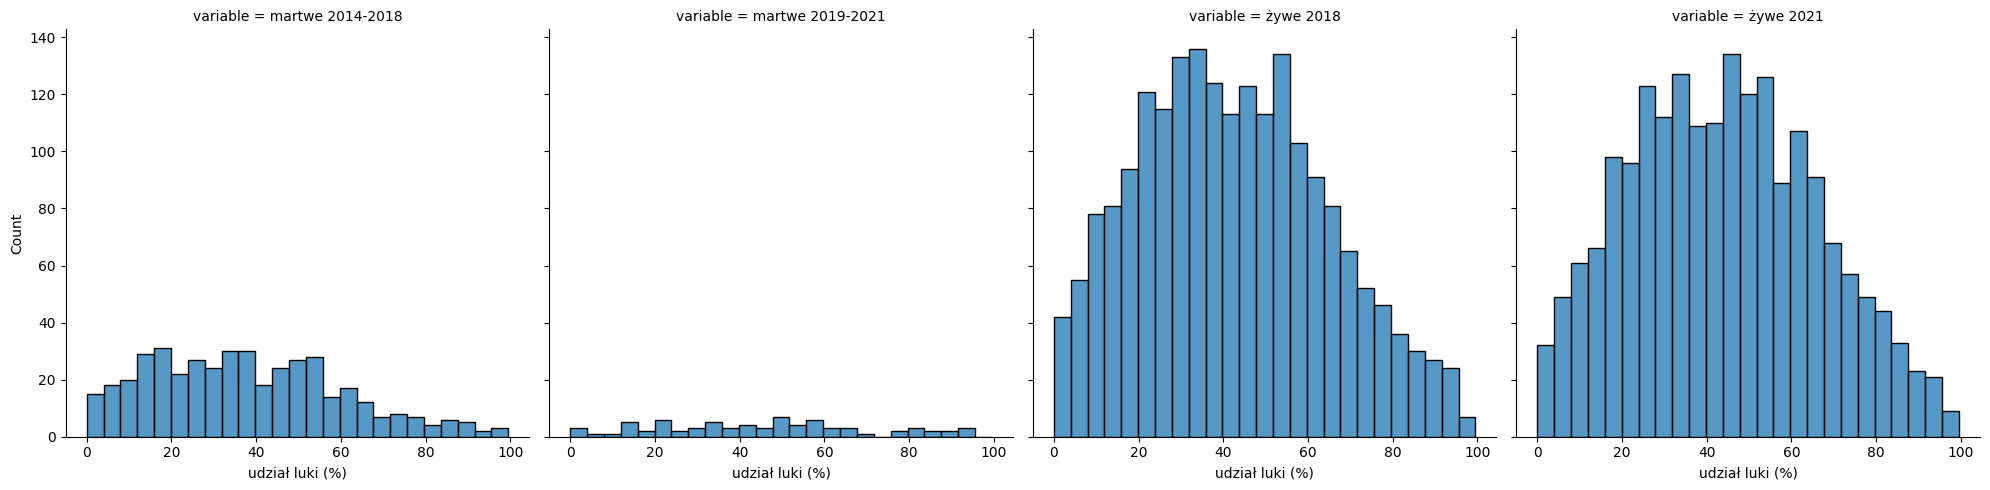

In [200]:
sns.displot(data = north_10m, x = 'udział luki (%)', col = 'variable')

In [209]:
ks_2samp(pd.DataFrame(north_10m.loc[(north_10m['variable'] == 'martwe 2014-2018')])['udział luki (%)'], 
         pd.DataFrame(north_10m.loc[(north_10m['variable'] == 'żywe 2018')])['udział luki (%)'])

KstestResult(statistic=0.09695799933508183, pvalue=0.0024019369450425164)

In [210]:
ks_2samp(pd.DataFrame(north_10m.loc[(north_10m['variable'] == 'martwe 2019-2021')])['udział luki (%)'], 
         pd.DataFrame(north_10m.loc[(north_10m['variable'] == 'żywe 2021')])['udział luki (%)'])

KstestResult(statistic=0.09293479764308833, pvalue=0.5371724879883158)

#### South

In [211]:
south_10m.reset_index(inplace=True)
south_10m

,index,variable,value,udział luki (%)
0,0,martwe 2014-2018,84.860169,54.051063
1,1,martwe 2014-2018,88.092842,56.110091
2,2,martwe 2014-2018,108.264462,68.958256
3,3,martwe 2014-2018,60.760120,38.700713
4,4,martwe 2014-2018,51.814660,33.002968
...,...,...,...,...
4497,37409,żywe 2021,11.524499,7.340445
4498,37410,żywe 2021,15.068349,9.597675
4499,37411,żywe 2021,13.406164,8.538958
4500,37412,żywe 2021,63.635202,40.531976


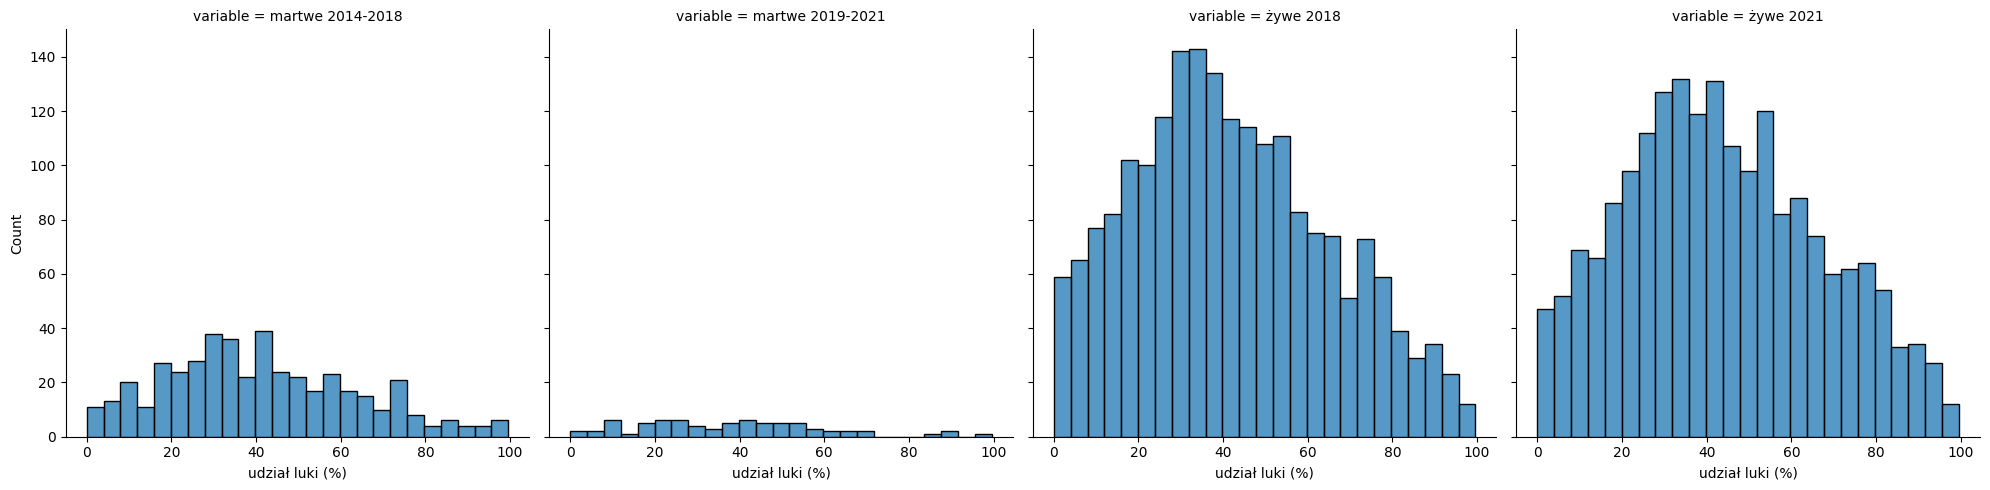

In [212]:
sns.displot(data = south_10m, x = 'udział luki (%)', col = 'variable')

In [214]:
ks_2samp(pd.DataFrame(south_10m.loc[(south_10m['variable'] == 'martwe 2014-2018')])['udział luki (%)'], 
         pd.DataFrame(south_10m.loc[(south_10m['variable'] == 'żywe 2018')])['udział luki (%)'])

KstestResult(statistic=0.04144049187527448, pvalue=0.5355858829007178)

In [215]:
ks_2samp(pd.DataFrame(south_10m.loc[(south_10m['variable'] == 'martwe 2019-2021')])['udział luki (%)'], 
         pd.DataFrame(south_10m.loc[(south_10m['variable'] == 'żywe 2021')])['udział luki (%)'])

KstestResult(statistic=0.14766660211900745, pvalue=0.0801861462426731)